## Business Goal

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 

The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Data Understanding and Exploration

In [1707]:
# Importing all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import scale
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
%matplotlib inline

In [1708]:
# Importing the dataset
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1709]:
# Information on housing data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Data Cleaning

Lets clean the columns having null values

In [1710]:
# Finding number of null values in LotFrontage
housing['LotFrontage'].isnull().sum()

259

In [1711]:
# Finding percentage of null values in LotFrontage
(housing['LotFrontage'].isnull().sum()/len(housing.index))*100

17.73972602739726

Since percentage of null values is considerable, we will impute these missing values

In [1712]:
# Finding percentiles of LotFrontage
housing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

We will replace the null values with median value

In [1713]:
# Replacing the LotFrontage null values with median
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing['LotFrontage'].median())

In [1714]:
# Number of null values after cleaning
housing['LotFrontage'].isnull().sum()

0

In [1715]:
# Percentage of null values in Alley
(housing['Alley'].isnull().sum()/len(housing.index))*100

93.76712328767123

We see that 93% of values in Alley are null and these null values represent 'No_alley_access'

In [1716]:
# Replacing the NA values in Alley
housing['Alley'] = housing['Alley'].fillna('No_Alley_Access')

In [1717]:
# Checking number of null values in Alley
housing['Alley'].isnull().sum()

0

In [1718]:
# Percentage of null values in MasVnrType
(housing['MasVnrType'].isnull().sum()/len(housing.index))*100

0.547945205479452

In [1719]:
# Checking values present in MasVnrType
housing['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

We will impute the missing values with 'None' in column MasVnrType

In [1720]:
# Imputing missing values in MasVnrType
housing['MasVnrType'] = housing['MasVnrType'].fillna(housing['MasVnrType'].mode()[0])

In [1721]:
# Checking count of values in MasVnrType
housing['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [1722]:
# Percentage of null values in MasVnrArea
(housing['MasVnrArea'].isnull().sum()/len(housing.index))*100

0.547945205479452

In [1723]:
# Checking percentiles of MasVanArea
housing['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

We will impute the null values with value 0 as it is median and corresponding NA values of MasVnrType are None 

In [1724]:
# Imputing null values with median
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(housing['MasVnrArea'].median())

In [1725]:
# Checking number of null values in MasVnrArea
housing['MasVnrArea'].isnull().sum()

0

In [1726]:
# Percentage of null values in BsmtQual
(housing['BsmtQual'].isnull().sum()/len(housing.index))*100

2.5342465753424657

In [1727]:
# Imputing null values of BsmtQuality with 'No_Basement'
housing['BsmtQual'] = housing['BsmtQual'].fillna('No_Basement')

In [1728]:
# Checking number of null values in BsmtQual
housing['BsmtQual'].isnull().sum()

0

In [1729]:
# Checking percentage of null values in BsmtCond
(housing['BsmtCond'].isnull().sum()/len(housing.index))*100

2.5342465753424657

In [1730]:
# Imputing null values of BsmtCond with 'No_Basement'
housing['BsmtCond'] = housing['BsmtCond'].fillna('No_Basement')

In [1731]:
# Checking number of null values in BsmtCond
housing['BsmtCond'].isnull().sum()

0

In [1732]:
# Checking percentage of null values in BsmtExposure
(housing['BsmtExposure'].isnull().sum()/len(housing.index))*100

2.6027397260273974

In [1733]:
# Imputing null values with 'No_Basement'
housing['BsmtExposure'] = housing['BsmtExposure'].fillna('No_Basement')

In [1734]:
# Number of null values in BsmtExposure
housing['BsmtExposure'].isnull().sum()

0

In [1735]:
# Percentage of null values in BsmtFinType1
(housing['BsmtFinType1'].isnull().sum()/len(housing.index))*100

2.5342465753424657

In [1736]:
# Imputing null values of BsmtFinType1 with 'No_Basement'
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna('No_Basement')

In [1737]:
# Checking number of null values in BsmtFinType1
housing['BsmtFinType1'].isnull().sum()

0

In [1738]:
# Percentage of null values in BsmtFinType2
(housing['BsmtFinType2'].isnull().sum()/len(housing.index))*100

2.6027397260273974

In [1739]:
# Imputing null values of BsmtFinType2 with 'No_Basement'
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna('No_Basement')

In [1740]:
# Checking number of null values in BsmtFinType2
housing['BsmtFinType2'].isnull().sum()

0

In [1741]:
# Checking percentage of null values in Electrical
(housing['Electrical'].isnull().sum()/len(housing.index))*100

0.0684931506849315

In [1742]:
# Checking values in Electrical
housing['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [1743]:
# Imputing null values with 'SBrkr'
housing['Electrical'] = housing['Electrical'].fillna(housing['Electrical'].mode()[0])

In [1744]:
# Checking values in Electrical
housing['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [1745]:
# Number of null values in Electrical
housing['Electrical'].isnull().sum()

0

In [1746]:
# Percentage of null values in FirePlaceQual
(housing['FireplaceQu'].isnull().sum()/len(housing.index))*100

47.26027397260274

In [1747]:
# Replacing null values with 'No_FirePlace' 
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('No_FirePlace')

In [1748]:
# Checking number of null values in FireplaceQu
housing['FireplaceQu'].isnull().sum()

0

In [1749]:
# Percentage of null values in GarageType
(housing['GarageType'].isnull().sum()/len(housing.index))*100

5.5479452054794525

In [1750]:
# Imputing null values with 'No_Garage'
housing['GarageType'] = housing['GarageType'].fillna('No_Garage')

In [1751]:
# Checking number of null values in GarageType
housing['GarageType'].isnull().sum()

0

In [1752]:
# Percentage of null values in GarageYrBlt
(housing['GarageYrBlt'].isnull().sum()/len(housing.index))*100

5.5479452054794525

In [1753]:
# Imputing null values with 0
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(0)

In [1754]:
# Checking number of null values in GarageYrBlt
housing['GarageYrBlt'].isnull().sum()

0

In [1755]:
# Percentage of GarageQual
(housing['GarageQual'].isnull().sum()/len(housing.index))*100

5.5479452054794525

In [1756]:
# Imputing null values in GarageQual with 'No_Garage'
housing['GarageQual'] = housing['GarageQual'].fillna('No_Garage')

In [1757]:
# Checking number of null values in GarageQual
housing['GarageQual'].isnull().sum()

0

In [1758]:
# Percentage of null values in GarageFinish
(housing['GarageFinish'].isnull().sum()/len(housing.index))*100

5.5479452054794525

In [1759]:
# Imputing null values of GarageFinish with 'No_Garage'
housing['GarageFinish'] = housing['GarageFinish'].fillna('No_Garage')

In [1760]:
# Number of null values in GarageFinish
housing['GarageFinish'].isnull().sum()

0

In [1761]:
# Percenatge of null values in GarageCond
(housing['GarageCond'].isnull().sum()/len(housing.index))*100

5.5479452054794525

In [1762]:
# Imputing the null values of GarageCond with 'No_Garage'
housing['GarageCond'] = housing['GarageCond'].fillna('No_Garage')

In [1763]:
# Number of null values in GarageCond
housing['GarageCond'].isnull().sum()

0

In [1764]:
# Imputing null values with 'No_Pool' in PoolQC
housing['PoolQC'] = housing['PoolQC'].fillna('No_Pool')

In [1765]:
# Number of null values in PoolQC
housing['PoolQC'].isnull().sum()

0

In [1766]:
# Imputing null values with 'No_Fence' in Fence
housing['Fence'] = housing['Fence'].fillna('No_Fence')

In [1767]:
# Number of null values in Fence
housing['Fence'].isnull().sum()

0

In [1768]:
# Imputing null values with 'None' in MiscFeature
housing['MiscFeature'] = housing['MiscFeature'].fillna('None')

In [1769]:
# Number of null values in MiscFeature
housing['MiscFeature'].isnull().sum()

0

In [1770]:
# Changing the MSSubClass column to categorical data type
housing['MSSubClass'] = housing['MSSubClass'].astype('object')

In [1771]:
# Changing the OverallQual column to categorical data type
housing['OverallQual'] = housing['OverallQual'].astype('object')

In [1772]:
# Changing the OverallCond column to categorical data type
housing['OverallCond'] = housing['OverallCond'].astype('object')

In [1773]:
# Replacing the numeric value with their corresponding representation 
housing[['MoSold']] = housing[['MoSold']].apply(lambda x : x.map({1 : 'Jan', 2 : 'Feb', 3: 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun', 7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'}))
housing.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No_Alley_Access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,Feb,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No_Alley_Access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,May,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No_Alley_Access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,Sep,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No_Alley_Access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,Feb,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No_Alley_Access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,Dec,2008,WD,Normal,250000


In [1774]:
# Changing the BsmtFullBath column to categorical data type
housing['BsmtFullBath'] = housing['BsmtFullBath'].astype('object')

In [1775]:
# Changing the BsmtHalfBath column to categorical data type
housing['BsmtHalfBath'] = housing['BsmtHalfBath'].astype('object')

In [1776]:
# Changing the FullBath column to categorical data type
housing['FullBath'] = housing['FullBath'].astype('object')

In [1777]:
# Changing the BsmtHalfBath column to categorical data type
housing['HalfBath'] = housing['HalfBath'].astype('object')

In [1778]:
# Changing the BsmtHalfBath column to categorical data type
housing['BedroomAbvGr'] = housing['BedroomAbvGr'].astype('object')

In [1779]:
# Changing the BsmtHalfBath column to categorical data type
housing['KitchenAbvGr'] = housing['KitchenAbvGr'].astype('object')

In [1780]:
# Changing the BsmtHalfBath column to categorical data type
housing['TotRmsAbvGrd'] = housing['TotRmsAbvGrd'].astype('object')

In [1781]:
# Changing the BsmtHalfBath column to categorical data type
housing['Fireplaces'] = housing['Fireplaces'].astype('object')

In [1782]:
# Changing the BsmtHalfBath column to categorical data type
housing['GarageCars'] = housing['GarageCars'].astype('object')

In [1783]:
housing_categorical = housing.select_dtypes(include = ['object'])
housing_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   object
 15  OverallCond    1460 non-null   object
 16  RoofStyle      1460 non-null   object
 17  RoofMatl       1460 non-null   object
 18  Exterior1st    1460 non-null

In [1784]:
housing_numeric = housing.select_dtypes(include = ['int64', 'float64'])
housing_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   YearBuilt      1460 non-null   int64  
 4   YearRemodAdd   1460 non-null   int64  
 5   MasVnrArea     1460 non-null   float64
 6   BsmtFinSF1     1460 non-null   int64  
 7   BsmtFinSF2     1460 non-null   int64  
 8   BsmtUnfSF      1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  1stFlrSF       1460 non-null   int64  
 11  2ndFlrSF       1460 non-null   int64  
 12  LowQualFinSF   1460 non-null   int64  
 13  GrLivArea      1460 non-null   int64  
 14  GarageYrBlt    1460 non-null   float64
 15  GarageArea     1460 non-null   int64  
 16  WoodDeckSF     1460 non-null   int64  
 17  OpenPorchSF    1460 non-null   int64  
 18  Enclosed

In [1785]:
housing = housing.drop(['Id', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'], axis = 1)

In [1786]:
#Creating dummy variables for categorical data
housing_dummies = pd.get_dummies(housing_categorical, drop_first = True)
housing_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [1787]:
housing = housing.drop(list(housing_categorical.columns), axis = 1)

In [1788]:
housing= pd.concat([housing, housing_dummies], axis = 1)

In [1789]:
housing.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,1,0,0,0,1,0


#### Data Exploration

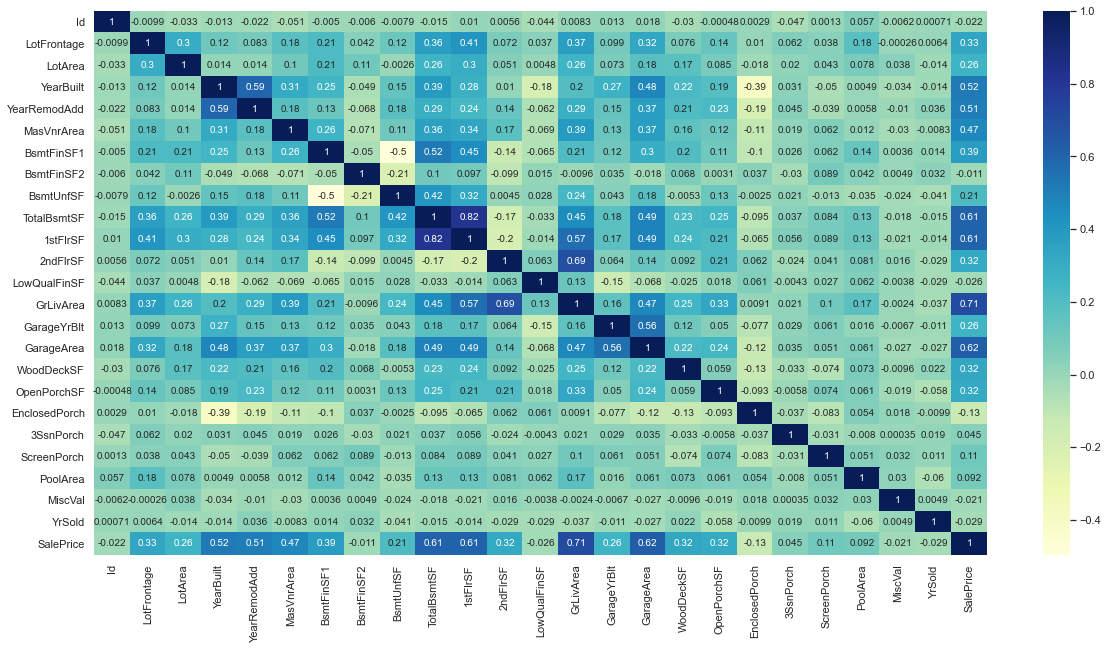

In [1790]:
# Plot heat map on correlation for housing_numeric dataset


plt.figure(figsize = (20,10))
sns.heatmap(housing_numeric.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

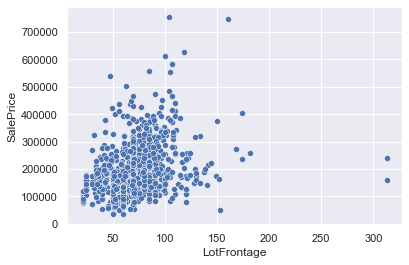

In [1791]:
sns.scatterplot(data = housing, x = "LotFrontage", y = 'SalePrice')
plt.show()

In [1792]:
housing['LotFrontage_Log'] = np.log(housing['LotFrontage'])

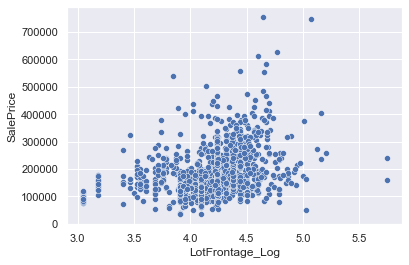

In [1793]:
sns.scatterplot(data = housing, x = "LotFrontage_Log", y = 'SalePrice')
plt.show()

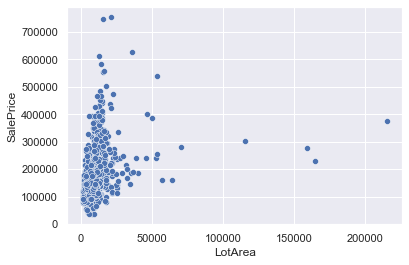

In [1794]:
sns.scatterplot(data = housing, x = "LotArea", y = 'SalePrice')
plt.show()

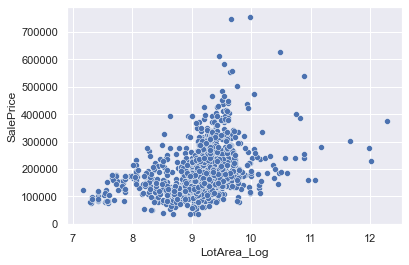

In [1795]:
housing['LotArea_Log'] = np.log(housing['LotArea'])
sns.scatterplot(data = housing, x = "LotArea_Log", y = 'SalePrice')
plt.show()

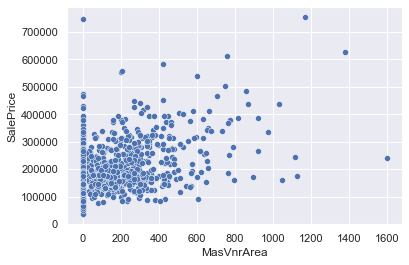

In [1796]:
sns.scatterplot(data = housing, x = "MasVnrArea", y = 'SalePrice')
plt.show()

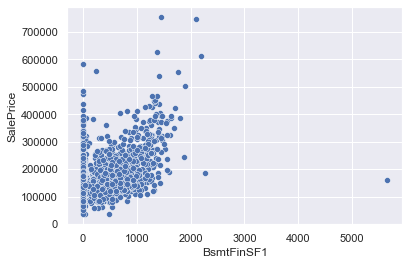

In [1797]:
sns.scatterplot(data = housing, x = "BsmtFinSF1", y = 'SalePrice')
plt.show()

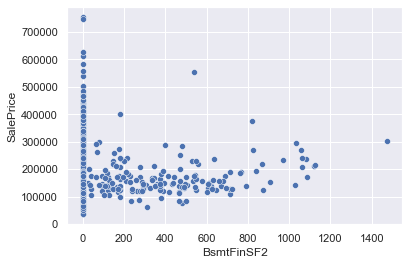

In [1798]:
sns.scatterplot(data = housing, x = "BsmtFinSF2", y = 'SalePrice')
plt.show()

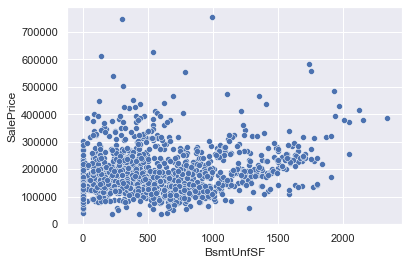

In [1799]:
sns.scatterplot(data = housing, x = "BsmtUnfSF", y = 'SalePrice')
plt.show()

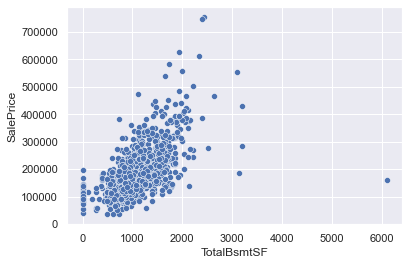

In [1800]:
sns.scatterplot(data = housing, x = "TotalBsmtSF", y = 'SalePrice')
plt.show()

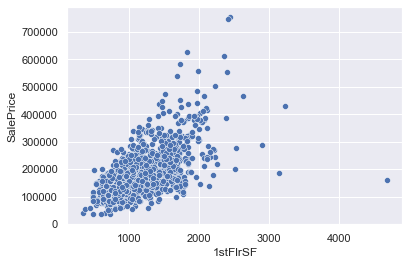

In [1801]:
sns.scatterplot(data = housing, x = "1stFlrSF", y = 'SalePrice')
plt.show()

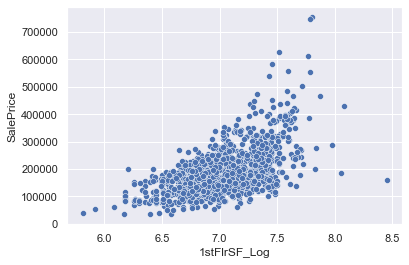

In [1802]:
housing['1stFlrSF_Log'] = np.log(housing['1stFlrSF'])
sns.scatterplot(data = housing, x = "1stFlrSF_Log", y = 'SalePrice')
plt.show()

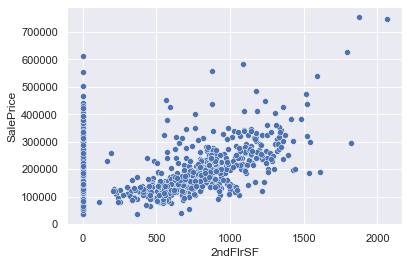

In [1803]:
sns.scatterplot(data = housing, x = "2ndFlrSF", y = 'SalePrice')
plt.show()

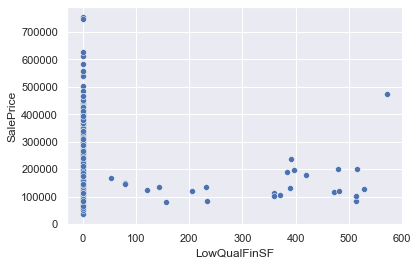

In [1804]:
sns.scatterplot(data = housing, x = "LowQualFinSF", y = 'SalePrice')
plt.show()

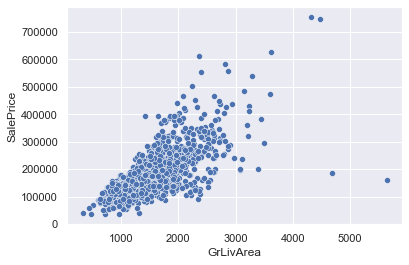

In [1805]:
sns.scatterplot(data = housing, x = "GrLivArea", y = 'SalePrice')
plt.show()

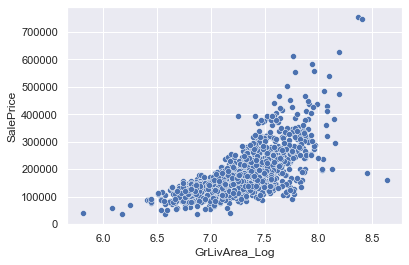

In [1806]:
housing['GrLivArea_Log'] = np.log(housing['GrLivArea'])
sns.scatterplot(data = housing, x = "GrLivArea_Log", y = 'SalePrice')
plt.show()

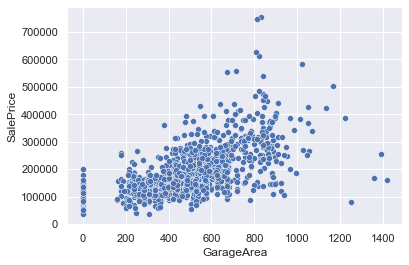

In [1807]:
sns.scatterplot(data = housing, x = "GarageArea", y = 'SalePrice')
plt.show()

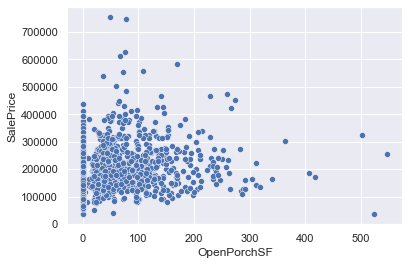

In [1808]:
sns.scatterplot(data = housing, x = "OpenPorchSF", y = 'SalePrice')
plt.show()

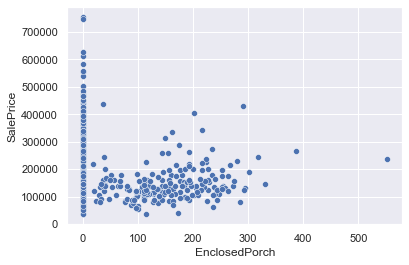

In [1809]:
sns.scatterplot(data = housing, x = "EnclosedPorch", y = 'SalePrice')
plt.show()

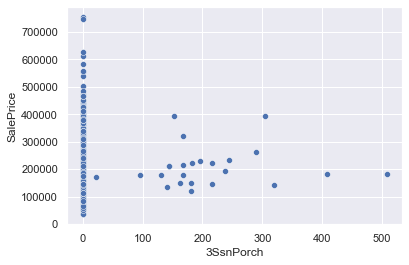

In [1810]:
sns.scatterplot(data = housing, x = "3SsnPorch", y = 'SalePrice')
plt.show()

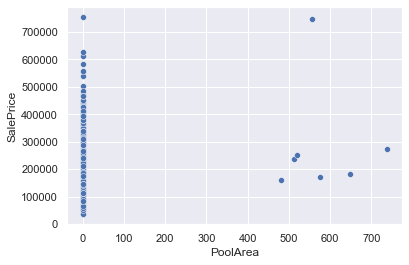

In [1811]:
sns.scatterplot(data = housing, x = "PoolArea", y = 'SalePrice')
plt.show()

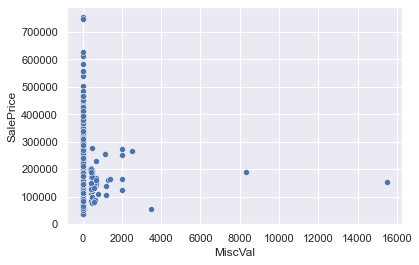

In [1812]:
sns.scatterplot(data = housing, x = "MiscVal", y = 'SalePrice')
plt.show()

In [1813]:
housing.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotFrontage_Log,LotArea_Log,1stFlrSF_Log,GrLivArea_Log
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,1,0,0,0,1,0,4.174387,9.041922,6.752270,7.444249
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,1,0,0,0,1,0,4.382027,9.169518,7.140453,7.140453
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,1,0,0,0,1,0,4.219508,9.328123,6.824374,7.487734
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,1,0,0,0,0,0,4.094345,9.164296,6.867974,7.448334
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,1,0,0,0,1,0,4.430817,9.565214,7.043160,7.695303


#### Data Preparation

In [1814]:
y = housing.pop('SalePrice')

In [1815]:
X = housing

In [1816]:
# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial',
       'LotFrontage_Log', 'LotArea_Log', '1stFlrSF_Log', 'GrLivArea_Log'],
      dtype='object', length=326)

In [1817]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [1688]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [1818]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    5.1s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1819]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [1820]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 4.11587455e+01  2.22751970e+03  2.93526511e+03  3.09521890e+03
  7.92585195e+02  1.70128365e+02  3.68073217e+03  4.04884855e+03
  3.43982739e+03 -7.41382180e+02  5.76761661e+03  2.75775530e+03
  1.42591374e+03  1.28690208e+03 -5.27529304e+02  1.20852690e+03
  1.18018877e+03  8.94099851e+02  3.37836158e+02 -1.13763323e+03
 -1.77065577e+02  1.21328352e+02 -2.17386580e+02  9.01220935e+02
  3.13720136e+02 -3.48178907e+02 -6.38060714e+02 -4.22660349e+02
 -8.08969011e+02 -7.28351115e+02 -5.46981762e+02 -1.81370877e+02
 -9.03346898e+02  8.82833448e+02  1.28522465e+02  9.37186934e+02
 -6.35149277e+02  6.39214133e+02  4.59272894e+02  6.23070379e+02
  3.41367792e+02 -6.99968512e+02 -2.27118463e+02  8.66694311e+02
  1.50083370e+02  1.17438911e+03 -7.44041872e+02  1.70513104e+03
 -8.52525789e+02 -1.70005578e+02 -4.35308379e+02  6.77367105e+02
  4.26450278e+01  1.46052669e+02  1.40480645e+02  1.73878416e+01
  4.54315601e+02 -3.73334732e+02  2.56183571e+03 -2.75893607e+03
 -3.07460409e+02 -8.79712

In [1821]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.9215423361800942
0.8380590077654537
500614721345.44836
456465103988.8793
490318042.45391613
1042157771.6641079


### Lasso

In [1822]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   49.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1823]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [1824]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [1696]:
lasso.coef_

array([ 4.80596370e+02,  2.56353381e+03,  1.61650669e+03,  7.61612374e+03,
        7.20918502e+02, -0.00000000e+00,  8.19015198e+03,  0.00000000e+00,
        0.00000000e+00, -2.25211938e+03,  2.99346824e+04,  1.81849938e+03,
        1.36704914e+02,  9.26552686e+02, -0.00000000e+00,  9.53312913e+02,
        7.24212853e+02,  1.76376211e+03,  0.00000000e+00, -1.82317366e+02,
        1.72931814e+03, -1.29505564e+04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -1.03732923e+03, -0.00000000e+00, -0.00000000e+00, -4.44226620e+02,
       -0.00000000e+00, -6.37520629e+02, -0.00000000e+00, -7.96098852e+02,
        0.00000000e+00,  0.00000000e+00,  5.60042375e+02, -0.00000000e+00,
        7.06895804e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        1.31068638e+02, -2.13123638e+01,  1.20270082e+03, -5.84410216e+02,
        0.00000000e+00, -

In [1697]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9501517179809817
0.5324999960524329
318066873234.74384
1317748119065.8313
311524851.3562623
3008557349.4653683


In [1698]:
# Creating a table which contain all the metrics

ridge_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge': metric1
        }

ridge_metric = pd.DataFrame(ridge_table ,columns = ['Metric', 'Ridge'] )

ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metric = pd.concat([ridge_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge,Lasso Regression
0,R2 Score (Train),9.223711e-01,9.501517e-01
1,R2 Score (Test),8.385353e-01,5.325000e-01
2,RSS (Train),4.953263e+11,3.180669e+11
3,RSS (Test),4.551227e+11,1.317748e+12
4,MSE (Train),2.202586e+04,1.765007e+04
5,MSE (Test),3.223496e+04,5.485032e+04


In [1699]:
betas = pd.DataFrame(index=X.columns)

In [1700]:
betas.rows = X.columns

In [1701]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [1702]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge,Lasso
LotFrontage,71.759848,480.596370
LotArea,2266.386628,2563.533807
MasVnrArea,2925.723071,1616.506694
BsmtFinSF1,3079.074657,7616.123742
BsmtFinSF2,805.972072,720.918502
BsmtUnfSF,133.675185,-0.000000
TotalBsmtSF,3632.154568,8190.151978
1stFlrSF,4026.825599,0.000000
2ndFlrSF,3488.094166,0.000000
LowQualFinSF,-739.413134,-2252.119379
